<a href="https://colab.research.google.com/github/viwaumich/stat_programming/blob/main/hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("tidyverse")
library(tidyverse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("nycflights13")
library(nycflights13)
options(repr.plot.width=5, repr.plot.height=4)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# STATS 306
## Homework 3:  Advanced `dplyr` and tidy data

For each problem, enter the R code in the cell marked "YOUR SOLUTION HERE".

## Problem 1: Why so delayed? (4 points)
The following code adds a variable `week` to `flights`, such that `week==1` for the first seven days of the year, `week==2` for days 8-14, etc. (In the second half of the semester we will learn how to work with times and date data using the `lubridate` package.)

In [ ]:
flights_week = mutate(flights, week=lubridate::week(time_hour))

**(a)** Make a bar plot of the proportion of flights each week whose actual departure time is NOT missing. The x-axis of your plot should contain the weeks of the year, ranging from 1 to 52, and the y-axis of your plot should be a number between 0 and 1 showing the decimal proportion of flights that have a departure time. What sort of plot geometry (line, bar, point, histogram, etc.) do you think is appropriate for this kind of plot? Does anything about this plot jump out at you? What and why? *1 point*

In [ ]:
# Your solution here
flights_week_a <- mutate(flights_week, bool_val = as.integer(!is.na(dep_time)))
flights_week_a <- select(flights_week_a, flight, week, dep_time, bool_val)
flights_week_a <- group_by(flights_week_a, week)

In [ ]:
flights_week_a <- group_by(flights_week_a, week)
flights_week_a <- summarize(flights_week_a, percentage = mean(bool_val))
head(flights_week_a)

week,percentage
<dbl>,<dbl>
1,0.9942614
2,0.9923064
3,0.9848787
4,0.9749175
5,0.9601449
6,0.8374037


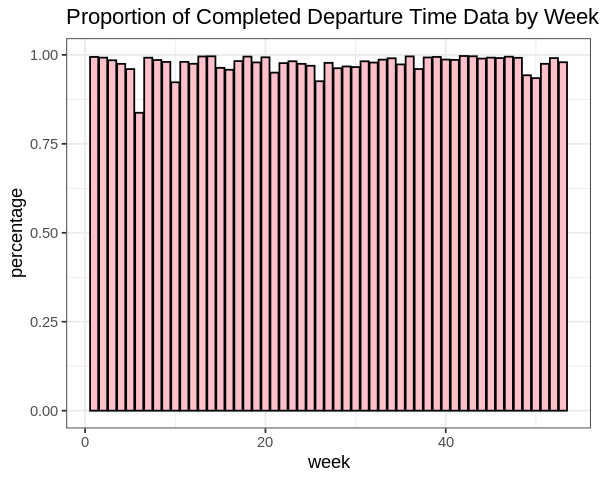

In [ ]:
ggplot(data = flights_week_a) +
  geom_bar(aes(week, percentage), stat = 'identity', fill = "pink", color = "black") +
  ggtitle('Proportion of Completed Departure Time Data by Week') +
  theme_bw()

**(b)** For the week with the highest fraction of missing departure times, generate a table which shows the proportion of missing departure times for each day of that week. Your table should have columns `year`, `month`, `day`, and `prop_miss_dep_time`. Sort your table in chronological order and store it in a variable called `table1b`. *1 point*

In [ ]:
#highest missing dep time
top_missing_dep_times <- head(arrange(flights_week_a, desc(1 - percentage)))

In [ ]:
table1b <- filter(flights_week, week == 6)
table1b <- select(table1b, flight, week, year, month, day, dep_time)
table1b <- mutate(table1b, dep_time_missing = as.integer(is.na(dep_time)))
table1b <- group_by(table1b, year, month, day)
table1b <- mutate(table1b, times_missing = mean(dep_time_missing))
table1b <- summarise(table1b, prop_miss_dep_time = mean(times_missing))
table1b

`summarise()` has grouped output by 'year', 'month'. You can override using the
`.groups` argument.


year,month,day,prop_miss_dep_time
<int>,<int>,<int>,<dbl>
2013,2,5,0.017857143
2013,2,6,0.008879023
2013,2,7,0.004291845
2013,2,8,0.507526882
2013,2,9,0.574561404
2013,2,10,0.031363088
2013,2,11,0.078579117


**(c)** 2 days in `table1b` should jump out at you. What you're discovering from the data is the [North American Blizzard of 2013](https://en.wikipedia.org/wiki/February_2013_North_American_blizzard). Many flights were cancelled due to extreme weather conditions. Identify the proportion of cancelled flights out of LaGuardia Airport (LGA) during the days that jumped out at you for each airline carrier in descending order. *1 point*

In [ ]:
# Your solution here
north_am_blizz <- filter(flights_week, year == 2013, month == 2, day == 8 | day == 9)
north_am_blizz <- filter(north_am_blizz, origin == 'LGA')
north_am_blizz <- select(north_am_blizz, flight, year, month, day, dep_time, carrier, flight, origin)
north_am_blizz <- group_by(north_am_blizz, carrier)
north_am_blizz <- mutate(north_am_blizz, cancelled = as.integer(is.na(dep_time)))
north_am_blizz <- summarize(north_am_blizz, prop_cancelled = mean(cancelled))
north_am_blizz <- arrange(north_am_blizz, desc(prop_cancelled))
north_am_blizz

carrier,prop_cancelled
<chr>,<dbl>
YV,1.0000000
9E,0.6666667
DL,0.6120690
MQ,0.6000000
UA,0.5625000
US,0.5593220
FL,0.5238095
B6,0.5000000
EV,0.5000000


**(d)** In your own words, summarize your findings from the previous exercises. Most importantly, comment on which airlines were the most and least cautious in terms of flight cancellations. Can you think of any reason why this might be? *1 point*

**Overall, the exercises indicate that airline carriers can have varying levels of cautiousness when it comes to flight cancellations. An average of around ~50% of flights were cancelled out of LGA during the North American Blizzard of 2013, but most carriers had cancellation proportions ranging between 0.43 and 0.67. YV was undoubtedly the most cautious, with 100% cancellation. AA was the least cautious, with 43% flight cancellation. However, if we examine the information further, we may ultimately conclude that cancellations were pretty evenly spread across carrieres. YV had 100% cancellation because it only had 2 scheduled flights. Meanwhile, American Airlines had 72 scheduled flights, meaning they would have lost a lot more money if they'd cancelled. Therefore, the carriers may have needed to consider the various pros and cons prior to making a final decision.**

## Problem 2: Graduate school admissions (4 points)
This problem studies a built-in dataset called `UCBAdmissions`. It contains graduate school admissions data from 1973 for six departments at UC Berkeley:

In [ ]:
data(UCBAdmissions)
ucb <- as_tibble(UCBAdmissions) %>% print

# A tibble: 24 × 4
   Admit    Gender Dept      n
   <chr>    <chr>  <chr> <dbl>
 1 Admitted Male   A       512
 2 Rejected Male   A       313
 3 Admitted Female A        89
 4 Rejected Female A        19
 5 Admitted Male   B       353
 6 Rejected Male   B       207
 7 Admitted Female B        17
 8 Rejected Female B         8
 9 Admitted Male   C       120
10 Rejected Male   C       205
# … with 14 more rows


(For privacy reasons the names of the departments have been changed to `A`, `B`, ... , `F`.)

**(a)**
Using the tool we learned for summarizing and manipulating tidy data, create a summary table from `ucb` which shows the acceptance rate by gender. Your table should have 5 columns: `Department`, `Gender`, `Admitted`, `Rejected`, and `Proportion Admitted`. Store it in a variable called `table3a`. *1 point*

<table>
<thead><tr><th scope="col">Department</th><th scope="col">Gender</th><th scope="col">Admitted</th><th scope="col">Rejected</th><th scope="col">Proportion_Admitted</th></tr></thead>
<tbody>
	<tr><td>A</td> <td>Female   </td><td> &dash;     </td><td>&dash;     </td><td>&dash;</td></tr>
	<tr><td>A</td> <td>Male   </td><td> &dash;     </td><td>&dash;     </td><td>&dash;</td></tr>
		<tr><td>B</td> <td>Female   </td><td> &dash;     </td><td>&dash;     </td><td>&dash;</td></tr>
			<tr><td>B</td> <td>Male   </td><td> &dash;     </td><td>&dash;     </td><td>&dash;</td></tr>
				<tr><td>C</td> <td>Female   </td><td> &dash;     </td><td>&dash;     </td><td>&dash;</td></tr>
					<tr><td>C</td> <td>Male   </td><td> &dash;     </td><td>&dash;     </td><td>&dash;</td></tr>
						<tr><td>D</td> <td>Female   </td><td> &dash;     </td><td>&dash;     </td><td>&dash;</td></tr>
							<tr><td>D</td> <td>Male   </td><td> &dash;     </td><td>&dash;     </td><td>&dash;</td></tr>
								<tr><td>E</td> <td>Female   </td><td> &dash;     </td><td>&dash;     </td><td>&dash;</td></tr> 	<tr><td>E</td> <td>Male   </td><td> &dash;     </td><td>&dash;     </td><td>&dash;</td></tr> 	<tr><td>F</td> <td>Female   </td><td> &dash;     </td><td>&dash;     </td><td>&dash;</td></tr> 	<tr><td>F</td> <td>Male   </td><td> &dash;     </td><td>&dash;     </td><td>&dash;</td></tr>
</tbody>
</table>

(A few entries have been provided for you; your job is to write code that will produce the complete table with no blanks.)

In [ ]:
# Your solution here
table3a <- group_by(ucb, Gender)
table3a <- pivot_wider(ucb, names_from = "Admit", values_from = "n")
table3a <- mutate(table3a, Proportion_Admitted = Admitted/(Admitted + Rejected))
table3a <- rename(table3a, Department = "Dept")
table3a <- select(table3a, Department, Gender, Admitted, Rejected, Proportion_Admitted)
table3a <- arrange(table3a, Department, Gender)
table3a

Department,Gender,Admitted,Rejected,Proportion_Admitted
<chr>,<chr>,<dbl>,<dbl>,<dbl>
A,Female,89,19,0.82407407
A,Male,512,313,0.62060606
B,Female,17,8,0.68000000
B,Male,353,207,0.63035714
C,Female,202,391,0.34064081
C,Male,120,205,0.36923077
D,Female,131,244,0.34933333
D,Male,138,279,0.33093525
E,Female,94,299,0.23918575


**(b)**
In STATS 250 you [learned](https://www.youtube.com/watch?v=6gfMhsWmnwk) how to test for differences in proportions between two populations. Apply this to part (a) `table3a`. Was the overall proportion of men admitted statistically different from that of women? Perform an appropriate test and interpret your findings. What do these result suggest about admissions practices at UC Berkeley in the early 1970s? *1 point*

(Hint: use the `prop.test()` function.)

In [ ]:
# You solution here
table3b <- table3a

males <- filter(table3b, Gender == "Male")
admitted_males <- sum(males$Admitted)
all_males <- sum(males$Admitted) + sum(males$Rejected)

females <- filter(table3b, Gender == "Female")
admitted_females <- sum(females$Admitted)
all_females <- sum(females$Admitted) + sum(females$Rejected)

prop.test(x = c(1198, 557), n = c(2691, 1835), alternative = "two.sided")


	2-sample test for equality of proportions with continuity correction

data:  c(1198, 557) out of c(2691, 1835)
X-squared = 91.61, df = 1, p-value < 2.2e-16
alternative hypothesis: two.sided
95 percent confidence interval:
 0.1129887 0.1703022
sample estimates:
   prop 1    prop 2 
0.4451877 0.3035422 


**The X-squared value was 91.61, with a p-value of 2.2e-16. This means that there is a statistically significant higher proportion of males being accepted to UC Berkeley than females in the early 70s.**

**(c)**
Reproduce the table from Problem 1, but now stratify by department.
Compute the male and female acceptance proportion for each department separately. *1 point*

Your resulting table should look like:


<table>
<thead><tr><th scope="col">Dept</th><th scope="col">Female_Admitted</th><th scope="col">Female_Rejected</th><th scope="col">Male_Admitted</th><th scope="col">Male_Rejected</th><th scope="col">Male_Proportion_Admitted</th><th scope="col">Female_Proportion_Admitted</th></tr></thead>
<tbody>
	<tr><td>A         </td><td> 89      </td><td> &dash;       </td><td>&dash;       </td><td>&dash;       </td><td>&dash;</td><td>&dash;</td></tr>
	<tr><td>B         </td><td> &dash;       </td><td>  &dash;       </td><td>353</td><td>&dash;       </td><td>&dash;</td><td>&dash;</td></tr>
	<tr><td>C         </td><td> &dash;       </td><td>  391	     </td><td>&dash;</td><td>&dash;       </td><td>&dash;</td><td>&dash;</td></tr>
	<tr><td>D         </td><td> &dash;       </td><td>  &dash;       </td><td>&dash;</td><td>&dash;       </td><td>0.33093525	</td><td>&dash;</td></tr>
	<tr><td>E         </td><td> &dash;       </td><td>  &dash;       </td><td>&dash;</td><td>138       </td><td>&dash;</td><td>&dash;</td></tr>
 	<tr><td>F         </td><td> &dash;       </td><td>  &dash;       </td><td>&dash;</td><td>&dash;       </td><td>&dash;</td><td>0.07038123</td></tr>

</tbody>
</table>

(Again, a few table entries have been provided to help you check your work, and it is your job to provide code that computes the entire table automatically.)

In [ ]:
# Your solution here
table3c <- pivot_wider(ucb, names_from = "Admit", values_from = "n")
table3c <- group_by(table3c, Dept)
table3c <- pivot_wider(table3c, names_from = "Gender",
  values_from = c("Admitted", "Rejected"))
table3c <- mutate(table3c,
  Male_Proportion_Admitted = Admitted_Male/(Admitted_Male + Rejected_Male))
table3c <- mutate(table3c,
  Female_Proportion_Admitted = Admitted_Female/(Admitted_Female + Rejected_Female))
table3c <- select(table3c,
  Dept,
  Admitted_Female,
  Rejected_Female,
  Admitted_Male,
  Rejected_Male,
  Male_Proportion_Admitted,
  Female_Proportion_Admitted)
table3c <- rename(table3c,
  Female_Admitted = "Admitted_Female",
  Female_Rejected = "Rejected_Female",
  Male_Admitted = "Admitted_Male",
  Male_Rejected = "Rejected_Male")
table3c

Dept,Female_Admitted,Female_Rejected,Male_Admitted,Male_Rejected,Male_Proportion_Admitted,Female_Proportion_Admitted
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A,89,19,512,313,0.62060606,0.82407407
B,17,8,353,207,0.63035714,0.68000000
C,202,391,120,205,0.36923077,0.34064081
D,131,244,138,279,0.33093525,0.34933333
E,94,299,53,138,0.27748691,0.23918575
F,24,317,22,351,0.05898123,0.07038123


**(d)**
Do the department-level findings in part (c) agree or disagree with what you concluded in part (b)? Which departments agree with your conclusion in part (b) and which disagree? **Explain with numerical evidence for full credit.** *1 point*

In [ ]:
# Your solution here
dpt_a <- prop.test(x = c(89, 512), n = c(108, 825))
dpt_b <- prop.test(x = c(17, 353), n = c(25, 560))
dpt_c <- prop.test(x = c(202, 120), n = c(593, 325))
dpt_d <- prop.test(x = c(131, 138), n = c(375, 417))
dpt_e <- prop.test(x = c(94, 53), n = c(393, 191))
dpt_f <- prop.test(x = c(24, 22), n = c(341, 373))

dpt_a; dpt_b; dpt_c; dpt_d; dpt_e; dpt_f


	2-sample test for equality of proportions with continuity correction

data:  c(89, 512) out of c(108, 825)
X-squared = 16.372, df = 1, p-value = 5.205e-05
alternative hypothesis: two.sided
95 percent confidence interval:
 0.1191564 0.2877797
sample estimates:
   prop 1    prop 2 
0.8240741 0.6206061 



	2-sample test for equality of proportions with continuity correction

data:  c(17, 353) out of c(25, 560)
X-squared = 0.085098, df = 1, p-value = 0.7705
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.1584249  0.2577106
sample estimates:
   prop 1    prop 2 
0.6800000 0.6303571 



	2-sample test for equality of proportions with continuity correction

data:  c(202, 120) out of c(593, 325)
X-squared = 0.63322, df = 1, p-value = 0.4262
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.09583940  0.03865948
sample estimates:
   prop 1    prop 2 
0.3406408 0.3692308 



	2-sample test for equality of proportions with continuity correction

data:  c(131, 138) out of c(375, 417)
X-squared = 0.22159, df = 1, p-value = 0.6378
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.05022631  0.08702248
sample estimates:
   prop 1    prop 2 
0.3493333 0.3309353 



	2-sample test for equality of proportions with continuity correction

data:  c(94, 53) out of c(393, 191)
X-squared = 0.80805, df = 1, p-value = 0.3687
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.11842143  0.04181911
sample estimates:
   prop 1    prop 2 
0.2391858 0.2774869 



	2-sample test for equality of proportions with continuity correction

data:  c(24, 22) out of c(341, 373)
X-squared = 0.21824, df = 1, p-value = 0.6404
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.02758231  0.05038231
sample estimates:
    prop 1     prop 2 
0.07038123 0.05898123 


**Department A confirms the results obtained by the proportion results from part c, but Departments B-F seem to contradict the result we found that said males are preferentially accepted over females. This was because the p-value for these proportion tests was greater than 0.05 and chi-squared value was very small. Overall, this suggests that in Department A, males *were* preferentially admitted, but Departments B-F tests suggest that males and females were actually admitted equally.**

## Problem 3: Popular Baby Names of the Decade (2 points)
Recall from lecture the `babynames` dataset that contains a lot of information about frequency of baby names over time.

In [ ]:
install.packages("babynames")
library(babynames)
head(babynames)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



year,sex,name,n,prop
<dbl>,<chr>,<chr>,<int>,<dbl>
1880,F,Mary,7065,0.07238359
1880,F,Anna,2604,0.02667896
1880,F,Emma,2003,0.02052149
1880,F,Elizabeth,1939,0.01986579
1880,F,Minnie,1746,0.01788843
1880,F,Margaret,1578,0.01616720


**(a)** Generate a table that has **decade** on the vertical axis, and the most popular male **and** female name of each decade. A decade will be definied by the years ___0 - ___9. So for example, 1880-1889 is a decade followed by 1890-1899, etc. *1 point*

Hint: The `cut()` function can be used to "discretize" a continuous variable by placing each continuous observation into a bin. For example:

In [ ]:
v = 1:10  # vector of the numbers 1 through 10
cut(v, breaks=c(0, 5, 10))

[1] (0,5]  (0,5]  (0,5]  (0,5]  (0,5]  (5,10] (5,10] (5,10] (5,10] (5,10]
Levels: (0,5] (5,10]

converts the vector $v=(1, \dots, 10)$ into a *factor* (discrete variable) that has two levels: $(0,5]$ and $(5, 10]$.

In [ ]:
popular_names <- babynames

In [ ]:
keys = list(list(1880,1889,"1880s"),
            list(1890,1899,"1890s"),
            list(1900,1909,"1900s"),
            list(1910,1919,"1910s"),
            list(1920,1929,"1920s"),
            list(1930,1939,"1930s"),
            list(1940,1949,"1940s"),
            list(1950,1959,"1950s"),
            list(1960,1969,"1960s"),
            list(1970,1979,"1970s"),
            list(1980,1989,"1980s"),
            list(1990,1999,"1990s"),
            list(2000,2009,"2000s"),
            list(2010,2019,"2010s"))
popular_names$decade = NA
for(k in keys){
  popular_names$decade[popular_names$year >= k[[1]] & popular_names$year <= k[[2]]]=k[[3]]
}

In [ ]:
install.packages("dplyr")
library(dplyr)

In [ ]:
begin_tidy <- group_by(popular_names, decade, sex, name)
select_tidy <- select(begin_tidy, decade, sex, name, n)
select_tidy <- arrange(select_tidy, decade, desc(n))
sum_by_Name <- summarise(select_tidy, totals_per_decade = sum(n))
sum_by_Name <- arrange(sum_by_Name, decade, desc(totals_per_decade))

In [ ]:
table3c <- group_by(sum_by_Name, decade, sex)
table3c <- arrange(table3c, decade, sex, desc(totals_per_decade))
new_analyze <- top_n(table3c, 1, totals_per_decade)
select(new_analyze, decade, name, sex, totals_per_decade)

decade,name,sex,totals_per_decade
<chr>,<chr>,<chr>,<int>
1880s,Mary,F,91668
1880s,John,M,89950
1890s,Mary,F,131136
1890s,John,M,80665
1900s,Mary,F,161505
1900s,John,M,84593
1910s,Mary,F,478642
1910s,John,M,376323
1920s,Mary,F,701746


**(b)** Do any names appear more than once? Write code that converts the table from part (a) into a dataframe with all the names that show up more than once. **Manual answers will not receive credit. Your code should automatically convert the table to a new one showing the duplicated names.** *1 point*

In [ ]:
# Your solution here
a <- new_analyze
a <- arrange(a, name)
a <- group_by(a, name)
newa <-
    a %>%
    group_by(name) %>% # the complete group of interest
    mutate(duplicate = n()) %>% # count number in each group
    filter(duplicate > 1) %>% # select only unique records
    select(duplicate) # remove group count column
distinct(newa, name, duplicate)

Adding missing grouping variables: `name`


name,duplicate
<chr>,<int>
James,2
Jessica,2
John,4
Mary,8
Michael,4
Robert,2
